In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
import scipy
from datetime import datetime
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import sklearn as sk
from sklearn import ensemble
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.patches as mpatches

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (15,15)
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
overall = pd.read_csv('./data/shootings_and_sales_per_pop.csv')

In [4]:
overall.head()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,totals,killed,killed_max,injured,incidents,injured_max,affected_max,affected_over_10,killed_ave,injured_ave,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
0,2013,United States,316234505.0,267.0,881038.0,788328.0,1,31029.0,26137.0,693076.0,2483230.0,16.0,5.0,39.0,12.0,6.0,7.0,0.0,1.333333,3.250000,0.084431,278.602741,249.285890,9.812022,8.265069,219.165205,785.249541,0.005060,0.012333,0.003795
1,2013,United States,316234505.0,375.0,770872.0,703223.0,2,31163.0,22709.0,664252.0,2298561.0,14.0,4.0,45.0,12.0,8.0,8.0,0.0,1.166667,3.750000,0.118583,243.765936,222.373899,9.854396,7.181063,210.050450,726.853320,0.004427,0.014230,0.003795
2,2013,United States,316234505.0,376.0,683266.0,700873.0,3,23878.0,23817.0,695386.0,2197116.0,25.0,6.0,75.0,19.0,13.0,13.0,1.0,1.315789,3.947368,0.118899,216.063076,221.630780,7.550726,7.531436,219.895675,694.774278,0.007906,0.023717,0.006008
3,2013,United States,316234505.0,665.0,533674.0,554003.0,4,18624.0,21136.0,517224.0,1702455.0,26.0,6.0,52.0,17.0,5.0,7.0,0.0,1.529412,3.058824,0.210287,168.758940,175.187398,5.889300,6.683648,163.557105,538.352069,0.008222,0.016443,0.005376
4,2013,United States,316234505.0,619.0,445522.0,436674.0,5,16057.0,15605.0,449993.0,1424450.0,18.0,5.0,99.0,24.0,19.0,19.0,1.0,0.750000,4.125000,0.195741,140.883424,138.085501,5.077561,4.934629,142.297249,450.441042,0.005692,0.031306,0.007589


In [5]:
df = overall[overall.state!='United States']

In [6]:
training = ['year','population','month',
            'killed','state',
            'killed_max','injured','incidents',
            'injured_max','affected_max','affected_over_10',
            'killed_ave','injured_ave',
            'killed_pop','injured_pop','incidents_pop']
testing = ['totals_pop']
# 'admin_pop',
#             'handgun_pop','long_gun_pop','multiple_pop',
#             'other_pop','permit_pop',

In [7]:
le = sk.preprocessing.LabelEncoder()
le.fit(df.state)
df.state = le.transform(df.state)

C:\Users\Elias\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
df.totals_pop = df.totals_pop.apply(lambda x:int(x))

train = sk.preprocessing.scale(df[training])

C:\Users\Elias\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features : 10


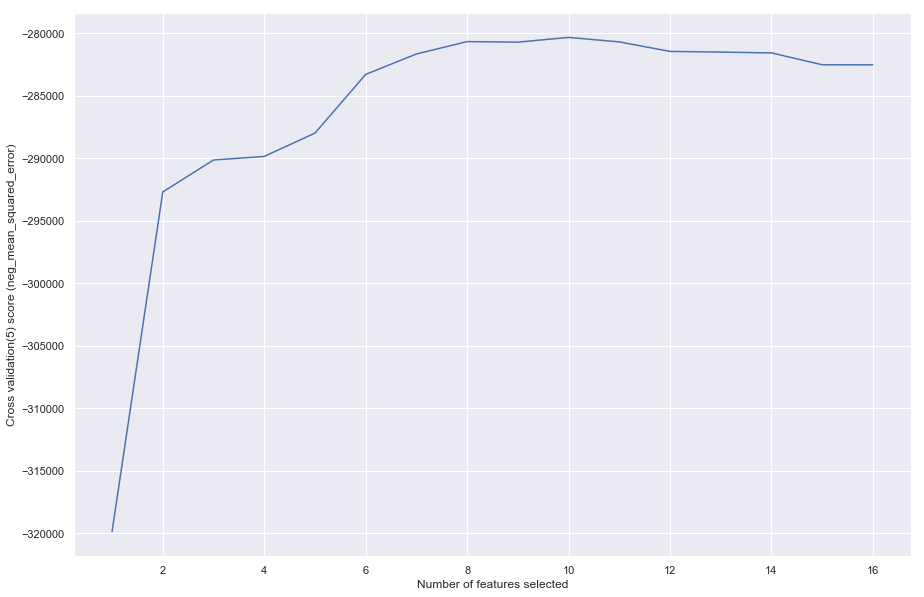

In [9]:
# Build a classification task using 3 informative features
X_train, X_test, y_train, y_test  = sk.model_selection.train_test_split(train,df[testing],train_size=.8,random_state=10)

# Create the RFE object and compute a cross-validated score.
svr = sk.svm.SVR(kernel='linear')
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svr, step=1, cv=StratifiedKFold(10),
              scoring='neg_mean_squared_error')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation(5) score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [10]:
rfecv.ranking_

array([1, 1, 1, 3, 1, 6, 1, 1, 2, 5, 7, 4, 1, 1, 1, 1])

In [11]:
ranked = rfecv.ranking_.copy()


In [12]:
ranked[ranked==1]=True
ranked[ranked!=True]=False

In [13]:
features = []
for t,r in zip(training,ranked):
    if(r):
        features.append(t)

In [14]:
features

['year',
 'population',
 'month',
 'state',
 'injured',
 'incidents',
 'injured_ave',
 'killed_pop',
 'injured_pop',
 'incidents_pop']

In [15]:
rf = ensemble.RandomForestRegressor()
gb = ensemble.GradientBoostingRegressor()
svr = sk.svm.SVR()
knn = sk.neighbors.KNeighborsRegressor()
mlp = sk.neural_network.MLPRegressor(max_iter=2000,solver='lbfgs')


In [16]:
train = sk.preprocessing.scale(df[features])
X_train, X_test, y_train, y_test  = sk.model_selection.train_test_split(train,df[testing],train_size=.8,random_state=10)


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


modelnames = ['random_forest','gradient_booster','support_vector_regression','knn','multi_layer_perceptron']

df_results = pd.DataFrame(data = {'model':modelnames,'mse':0,'mse_err':0})


models =[rf,gb,svr,knn,mlp]
i = 0

num_iters = 10

for model in models:
    
    mse = []
    
    for k in range(num_iters):
        model.fit(X_train,y_train)
        y_pred =  model.predict(X_test)
        mse.append(metrics.mean_squared_error(y_test,y_pred))
        
    
    
    for mname,mdata in zip(['mse'],[mse]):
        
        err_name = "{}_err".format(mname)
        ave = np.mean(mdata)
        df_results.loc[i,mname] = ave
        df_results.loc[i,err_name] = np.std(mdata) / np.sqrt(len(mdata))
    
    i+=1

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
df_results

,model,mse,mse_err
0,random_forest,59352.751858,3.927559e+03
1,gradient_booster,88683.629902,2.424345e+01
2,support_vector_regression,493640.136304,0.000000e+00
3,knn,502383.548562,1.840688e-11
4,multi_layer_perceptron,184252.395483,2.018082e+04


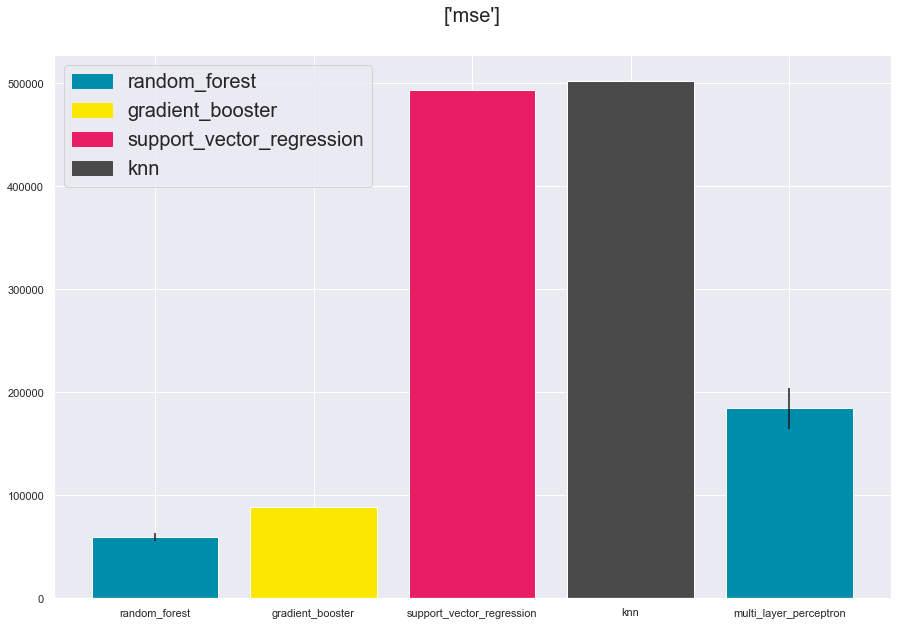

In [18]:
colors = ['#FCCE00','#0375B4','#007849','#262228']
colors = ['#0E0B16','#A239CA','#4717F6','#E7DFDD']
colors = ['#008DAB','#FCE700','#E81D64','#4A4A4A']


bigfont = 20
smallfont = 14
model_names = ['random_forest','gradient_booster','support_vector_regression','knn','multilayer_perceptron']
score_names = ['mse']

patches = []
for model_name,color in zip(model_names,colors):
    patches.append(mpatches.Patch(color=color, label=model_name))



plt.bar(modelnames,df_results.loc[:,'mse'],yerr=df_results.loc[:,'mse_err'],color=colors)
#plt.xticks(np.arange(4),model_names,rotation=90,fontsize=smallfont)

plt.title(score_names,fontsize=bigfont,position=(0.5,1.05))

plt.legend(handles=patches,fontsize=bigfont)
#plt.savefig('initial_model_compare.png',dpi=500,format='png')

In [21]:
param_test1 = {'criterion':['mse'],
                'max_features':list(range(2,11,1))
#                 'max_depth':list(range(2,33,8)),
#                 'min_samples_split':list(range(2,103,20)),
#                 'min_samples_leaf':list(range(1,32,6)),
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -246370.60413, std: 32616.69337, params: {'criterion': 'mse', 'max_features': 2},
  mean: -163388.82139, std: 36827.08741, params: {'criterion': 'mse', 'max_features': 3},
  mean: -133084.49266, std: 16447.85905, params: {'criterion': 'mse', 'max_features': 4},
  mean: -130613.40075, std: 15770.92506, params: {'criterion': 'mse', 'max_features': 5},
  mean: -125750.45441, std: 22285.07524, params: {'criterion': 'mse', 'max_features': 6},
  mean: -113272.18714, std: 25561.68722, params: {'criterion': 'mse', 'max_features': 7},
  mean: -105251.46687, std: 25838.21751, params: {'criterion': 'mse', 'max_features': 8},
  mean: -112919.80294, std: 29572.54661, params: {'criterion': 'mse', 'max_features': 9},
  mean: -106613.87879, std: 28992.81934, params: {'criterion': 'mse', 'max_features': 10}],
 {'criterion': 'mse', 'max_features': 8},
 -105251.466875)

In [24]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':list(range(2,33,2))
#                 'min_samples_split':list(range(2,103,20)),
#                 'min_samples_leaf':list(range(1,32,6)),
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -390466.73499, std: 65263.74538, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 2},
  mean: -159170.09167, std: 31100.63359, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 4},
  mean: -135995.89212, std: 31060.64463, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 6},
  mean: -114985.46053, std: 28741.74552, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 8},
  mean: -114904.10114, std: 26494.44831, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 10},
  mean: -103921.30929, std: 28762.33507, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 12},
  mean: -107288.47999, std: 28766.06703, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 14},
  mean: -105909.65304, std: 25946.32480, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 16},
  mean: -110263.67237, std: 30185.92730, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 18},
  mean: -105403.39985, std: 26054.67778, 

In [25]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':list(range(10,15,1))
#                 'min_samples_split':list(range(2,103,20)),
#                 'min_samples_leaf':list(range(1,32,6)),
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -114904.10114, std: 26494.44831, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 10},
  mean: -106709.50485, std: 25006.58390, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 11},
  mean: -103921.30929, std: 28762.33507, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 12},
  mean: -113032.44781, std: 28329.81243, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 13},
  mean: -107288.47999, std: 28766.06703, params: {'criterion': 'mse', 'max_features': 8, 'max_depth': 14}],
 {'criterion': 'mse', 'max_depth': 12, 'max_features': 8},
 -103921.30928723315)

In [26]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':list(range(2,103,20)),
                'min_samples_leaf':list(range(1,32,6))
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_split': 2, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -130017.25883, std: 43742.36555, params: {'min_samples_split': 22, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -156096.18797, std: 60602.21960, params: {'min_samples_split': 42, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -160640.90850, std: 60761.09967, params: {'min_samples_split': 62, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -174367.56012, std: 46410.58253, params: {'min_samples_split': 82, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -185591.18889, std: 52006.33974, params: {'min_samples_split': 102, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -119861.87493, std: 34241.71275, params: {'min_samples_split':

In [27]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':list(range(2,23,2)),
                'min_samples_leaf':list(range(1,7,1))
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_split': 2, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -106447.55465, std: 32732.62265, params: {'min_samples_split': 4, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -121771.44701, std: 29896.67465, params: {'min_samples_split': 6, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -114753.91844, std: 24655.73705, params: {'min_samples_split': 8, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -115073.33242, std: 26516.83862, params: {'min_samples_split': 10, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -119361.19722, std: 28230.79362, params: {'min_samples_split': 12, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -120449.27195, std: 27236.20686, params: {'min_samples_split': 14,

In [28]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':list(range(2,4,1)),
                'min_samples_leaf':list(range(1,7,1))
#                 'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_split': 2, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -110442.30295, std: 35225.16989, params: {'min_samples_split': 3, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 1, 'max_depth': 12},
  mean: -112492.33400, std: 23176.36493, params: {'min_samples_split': 2, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 2, 'max_depth': 12},
  mean: -112492.33400, std: 23176.36493, params: {'min_samples_split': 3, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 2, 'max_depth': 12},
  mean: -118555.31767, std: 25070.76072, params: {'min_samples_split': 2, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 3, 'max_depth': 12},
  mean: -118555.31767, std: 25070.76072, params: {'min_samples_split': 3, 'criterion': 'mse', 'max_features': 8, 'min_samples_leaf': 3, 'max_depth': 12},
  mean: -118532.78543, std: 25376.03032, params: {'min_samples_split': 2, 'c

In [29]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 10, 'max_depth': 12},
  mean: -113421.10225, std: 13602.88760, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 210, 'max_depth': 12},
  mean: -112493.59535, std: 14352.11299, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 410, 'max_depth': 12},
  mean: -112060.70481, std: 14046.90838, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 610, 'max_depth': 12},
  mean: -111747.44499, std: 13079.71468, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 810, 'max_depth': 12},
  mean: -111726.14320, std: 12671.74278, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion

In [30]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'n_estimators':list(range(10,211,10))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 10, 'max_depth': 12},
  mean: -107118.65296, std: 16063.44837, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 20, 'max_depth': 12},
  mean: -112662.21643, std: 12348.38510, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 30, 'max_depth': 12},
  mean: -115764.67860, std: 11311.99407, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 40, 'max_depth': 12},
  mean: -118678.34885, std: 13177.85716, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 50, 'max_depth': 12},
  mean: -118029.89604, std: 15379.67966, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': '

In [31]:
param_test1 = {'criterion':['mse'],
                'max_features':[8],
                'max_depth':[12],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'n_estimators':[10]
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -103921.30929, std: 28762.33507, params: {'min_samples_leaf': 1, 'max_features': 8, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 10, 'max_depth': 12}],
 {'criterion': 'mse',
  'max_depth': 12,
  'max_features': 8,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 10},
 -103921.30928723315)

In [32]:
param_test1 = {'criterion':['mse'],
                'max_features':list(range(2,11,1)),
                'max_depth':list(range(2,33,8)),
                'min_samples_split':list(range(2,103,20)),
                'min_samples_leaf':list(range(1,32,6)),
                'n_estimators':list(range(10,1011,200))
                }
gsearch1 = sk.model_selection.GridSearchCV(estimator = ensemble.RandomForestRegressor(random_state = 10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Elias\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -799487.64625, std: 156566.29273, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 10, 'max_depth': 2},
  mean: -732020.92880, std: 144354.42749, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 210, 'max_depth': 2},
  mean: -742680.24815, std: 147874.86084, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 410, 'max_depth': 2},
  mean: -746574.70329, std: 151116.54982, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 610, 'max_depth': 2},
  mean: -754655.03022, std: 152957.78584, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterion': 'mse', 'n_estimators': 810, 'max_depth': 2},
  mean: -759092.11153, std: 153545.93145, params: {'min_samples_leaf': 1, 'max_features': 2, 'min_samples_split': 2, 'criterio

In [42]:
rf = ensemble.RandomForestRegressor(random_state=10,
                                    criterion='mse',
                                    max_depth=12,
                                   max_features=8,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   n_estimators=10)

In [43]:
rf.fit(X_train,y_train)
y_pred =  model.predict(X_test)

In [44]:
metrics.mean_squared_error(y_test,y_pred)

329870.52978198073